In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import yfinance as yf

In [2]:
df_2024 = pd.read_csv('coealg4uljn8tdpb.csv')
#ticker_series = df_2024[['permno', 'TICKER']].drop_duplicates(subset='permno')

df_2024_smol = df_2024[['public_date',
    'de_ratio', 'ptb', 'debt_assets','inv_turn','at_turn','rect_turn','cash_ratio',
    'pe_inc', 'gpm', 'roe', 'roa', # income statement
    'cfm', 'cash_debt', # cash flow
    'TICKER', 'permno'
]].dropna()

In [3]:
df_siccd_start = pd.read_csv('PERMNO_2_SICCD.csv')

In [4]:
# find common permno
df_2024_smol['permno'] = df_2024_smol['permno'].astype(int)
df_siccd_start['PERMNO'] = df_siccd_start['PERMNO'].astype(int)

# Step 1: Find the common PERMNOs between the two datasets
common_permnos = set(df_2024_smol['permno']).intersection(set(df_siccd_start['PERMNO']))

In [5]:
df_2024_smol_filtered = df_2024_smol[df_2024_smol['permno'].isin(common_permnos)]
df_siccd_start_filtered = df_siccd_start[df_siccd_start['PERMNO'].isin(common_permnos)]

print(len(df_2024_smol_filtered))
print(len(df_siccd_start_filtered))

del df_2024
del df_2024_smol
del df_siccd_start

296965
5034


In [7]:
df_siccd_start_filtered['starting_date'] = pd.to_datetime(df_siccd_start_filtered['starting_date'], errors='coerce')
df_siccd_start_filtered = df_siccd_start_filtered.sort_values(by=['PERMNO', 'starting_date'])

df_siccd_start_filtered['end_date'] = df_siccd_start_filtered.groupby('PERMNO')['starting_date'].shift(-1)
df_siccd_start_filtered['end_date'] = pd.to_datetime(df_siccd_start_filtered['end_date'], errors='coerce')

df_siccd_start_filtered


,Unnamed: 0,PERMNO,SICCD,starting_date,end_date
0,0,10001,4925,2010-01-04,NaT
2,2,10025,3081,2010-01-04,NaT
3,3,10026,2052,2010-01-04,NaT
4,4,10028,5094,2010-01-04,NaT
5,5,10032,3670,2010-01-04,NaT
...,...,...,...,...,...
19422,19422,93429,7374,2023-08-11,NaT
19427,19427,93432,7389,2010-06-08,NaT
19429,19429,93434,9999.0,2010-06-14,NaT
19430,19430,93435,6163,2010-06-14,NaT


In [8]:
df_merged = df_2024_smol_filtered.merge(df_siccd_start_filtered, left_on='permno', right_on='PERMNO', how='left')


df_merged = df_merged.rename(columns={'SICCD': 'tentativeSICCD'})


df_merged['public_date'] = pd.to_datetime(df_merged['public_date'], errors='coerce')
df_merged['starting_date'] = pd.to_datetime(df_merged['starting_date'], errors='coerce')

# Now apply the conditional logic after converting dates
df_merged['correct_siccd'] = df_merged.apply(
    lambda row: row['tentativeSICCD'] if (pd.isnull(row['end_date']) and row['public_date'] >= row['starting_date'])
    else (row['tentativeSICCD'] if row['starting_date'] <= row['public_date'] < row['end_date'] else None),
    axis=1
)

# Optionally filter rows where 'correct_siccd' is None
df_merged_filtered = df_merged.dropna(subset=['correct_siccd'])


print('len df_merged_filtered', len(df_merged_filtered))

# Display the filtered result
print(df_merged_filtered.head())


len df_merged_filtered 296965
  public_date  de_ratio    ptb  debt_assets  inv_turn  at_turn  rect_turn  \
0  2010-01-31     0.991  1.152        0.498     2.272    1.001      6.346   
2  2010-02-28     0.991  1.128        0.498     2.272    1.001      6.346   
4  2010-03-31     0.991  1.237        0.498     2.272    1.001      6.346   
6  2010-04-30     0.897  1.197        0.473     2.312    0.987      6.314   
8  2010-05-31     0.897  0.968        0.473     2.312    0.987      6.314   

   cash_ratio  pe_inc    gpm  ...    cfm  cash_debt  TICKER  permno  \
0       0.466  16.550  0.201  ...  0.073      0.089     AIR   54594   
2       0.466  16.200  0.201  ...  0.073      0.089     AIR   54594   
4       0.466  17.729  0.201  ...  0.073      0.089     AIR   54594   
6       0.545  19.821  0.195  ...  0.067      0.089     AIR   54594   
8       0.545  16.016  0.195  ...  0.067      0.089     AIR   54594   

  Unnamed: 0  PERMNO  tentativeSICCD  starting_date   end_date correct_siccd  
0

In [10]:
for a,b in df_merged_filtered.TICKER.value_counts().items():
    print(a,b)

AIR 156
GTLS 156
NL 156
CNK 156
KAI 156
NSSC 156
PDCO 156
MTX 156
NFG 156
NHC 156
LFUS 156
PODD 156
NPK 156
CAKE 156
INFN 156
CENTA 156
NJR 156
GPK 156
NWL 156
NEM 156
NR 156
NKE 156
BSX 156
NCR 156
PESI 156
CNP 156
MUR 156
ALG 156
SCVL 156
CVS 156
UEIC 156
MRK 156
MLAB 156
MEI 156
CLNE 156
RCKY 156
MU 156
ETR 156
MSEX 156
AVAV 156
MSA 156
MMM 156
ALE 156
PRTS 156
MOD 156
QDEL 156
MOG 156
ULBI 156
BKE 156
NDSN 156
JWN 156
NSC 156
OC 156
OI 156
OXM 156
PPG 156
PCG 156
SRE 156
AMSC 156
JBSS 156
WNC 156
PKE 156
PKOH 156
PH 156
PATK 156
LULU 156
BIIB 156
FIZZ 156
EZPW 156
PPL 156
ZBRA 156
PEP 156
MNRO 156
OMI 156
QCOM 156
OTTR 156
NWE 156
NC 156
MOV 156
AGCO 156
MASI 156
NI 156
XEL 156
NOC 156
TEX 156
NWN 156
KOPN 156
GILD 156
NUE 156
MHK 156
OXY 156
OII 156
ICUI 156
FE 156
ODC 156
OGE 156
ROP 156
MCHP 156
AIMC 156
FOSL 156
ZEUS 156
RS 156
WVVI 156
IVC 156
DAR 156
ADTN 156
EME 156
MLR 156
JNJ 156
KLAC 156
MATW 156
HBI 156
SSD 156
FSLR 156
KAMN 156
AEO 156
EXP 156
SCSC 156
NNBR 156
K 156
KM

In [13]:
# pick only five
five = ['XOM', 'AAPL', 'WMT', 'AIR', 'LH']

In [14]:
df_merged_five = df_merged_filtered[df_merged_filtered.TICKER.apply(lambda x:x in five)]
df_merged_five

,public_date,de_ratio,ptb,debt_assets,inv_turn,at_turn,rect_turn,cash_ratio,pe_inc,gpm,...,cfm,cash_debt,TICKER,permno,Unnamed: 0,PERMNO,tentativeSICCD,starting_date,end_date,correct_siccd
0,2010-01-31,0.991,1.152,0.498,2.272,1.001,6.346,0.466,16.550,0.201,...,0.073,0.089,AIR,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0
2,2010-02-28,0.991,1.128,0.498,2.272,1.001,6.346,0.466,16.200,0.201,...,0.073,0.089,AIR,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0
4,2010-03-31,0.991,1.237,0.498,2.272,1.001,6.346,0.466,17.729,0.201,...,0.073,0.089,AIR,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0
6,2010-04-30,0.897,1.197,0.473,2.312,0.987,6.314,0.545,19.821,0.195,...,0.067,0.089,AIR,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0
8,2010-05-31,0.897,0.968,0.473,2.312,0.987,6.314,0.545,16.016,0.195,...,0.067,0.089,AIR,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173635,2022-08-31,0.963,1.958,0.490,21.406,0.689,4.683,0.534,10.773,0.363,...,0.189,0.308,LH,12062,360,12062,8071,2010-01-04,NaT,8071
173636,2022-09-30,0.963,1.780,0.490,21.406,0.689,4.683,0.534,9.795,0.363,...,0.189,0.308,LH,12062,360,12062,8071,2010-01-04,NaT,8071
173637,2022-10-31,0.963,1.928,0.490,21.406,0.689,4.683,0.534,10.610,0.363,...,0.189,0.308,LH,12062,360,12062,8071,2010-01-04,NaT,8071
173638,2022-11-30,0.959,2.113,0.489,19.132,0.639,4.314,0.397,12.824,0.357,...,0.187,0.308,LH,12062,360,12062,8071,2010-01-04,NaT,8071


In [16]:
df_merged_five.to_csv('df_merged_five.csv')

## construct daily merged filtered

In [ ]:
df_merged_filtered = pd.read_csv('df_merged_filtered.csv')

In [17]:
earliest_dates = df_merged_five.groupby('TICKER')['public_date'].min().reset_index()

In [ ]:
import os
import pandas as pd
import yfinance as yf



folder_path = ''

daily_return_data_list = []

# Loop through each TICKER to fetch stock data from the earliest public_date
for index, row in earliest_dates.iterrows():
    ticker = row['TICKER']
    start_date = row['public_date']
    
    # Define the file path for the ticker's CSV
    file_path = os.path.join(folder_path, f"{ticker}.csv")

    # Check if the file already exists
    if os.path.exists(file_path):
        # Load data from the existing CSV file
        stock_data = pd.read_csv(file_path, parse_dates=['Date'])
        print(f'{ticker} loaded from CSV')
    else:
        # Download the data if the file does not exist
        try:
            stock_data = yf.download(ticker, start=start_date, progress=False)
            

            stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()
            
            stock_data['TICKER'] = ticker
            stock_data['Date'] = stock_data.index  # Resetting the index for merging

            stock_data.to_csv(file_path, index=False)
            print(f'{ticker} downloaded and saved to CSV')
        
        except Exception as e:
            print(f'{ticker} download failure: {e}')
            continue  # Skip to the next ticker on failure

    # Append the data to the list
    daily_return_data_list.append(stock_data[['TICKER', 'Date', 'Daily_Return']])

# Combine all the results into a single DataFrame
daily_returns_df = pd.concat(daily_return_data_list).reset_index(drop=True)
daily_returns_df['Date'] = pd.to_datetime(daily_returns_df['Date'])


In [ ]:
# after doing that,

In [18]:
daily_returns_df = pd.read_csv('daily_returns.csv')
daily_returns_df['Date'] = pd.to_datetime(daily_returns_df['Date'])
daily_returns_df['month_key'] = daily_returns_df['Date'].dt.to_period('M')
daily_returns_df

,Unnamed: 0,TICKER,Date,Daily_Return,month_key
0,1,A,2010-02-02,0.012701,2010-02
1,2,A,2010-02-03,0.001355,2010-02
2,3,A,2010-02-04,-0.015910,2010-02
3,4,A,2010-02-05,0.003440,2010-02
4,5,A,2010-02-08,0.001029,2010-02
...,...,...,...,...,...
5646534,5648880,ZYXI,2024-09-23,-0.017241,2024-09
5646535,5648881,ZYXI,2024-09-24,0.016291,2024-09
5646536,5648882,ZYXI,2024-09-25,-0.014797,2024-09
5646537,5648883,ZYXI,2024-09-26,0.033792,2024-09


In [19]:
daily_returns_df_five = daily_returns_df[daily_returns_df.TICKER.apply(lambda x:x in five)]
daily_returns_df_five

,Unnamed: 0,TICKER,Date,Daily_Return,month_key
22194,22203,AAPL,2010-02-02,0.005803,2010-02
22195,22204,AAPL,2010-02-03,0.017206,2010-02
22196,22205,AAPL,2010-02-04,-0.036038,2010-02
22197,22206,AAPL,2010-02-05,0.017755,2010-02
22198,22207,AAPL,2010-02-08,-0.006856,2010-02
...,...,...,...,...,...
5578467,5580777,XOM,2024-09-23,0.018131,2024-09
5578468,5580778,XOM,2024-09-24,-0.002641,2024-09
5578469,5580779,XOM,2024-09-25,-0.019479,2024-09
5578470,5580780,XOM,2024-09-26,-0.017165,2024-09


In [20]:
daily_returns_df_five.TICKER.value_counts()

TICKER
AAPL    3689
AIR     3689
LH      3689
WMT     3689
XOM     3689
Name: count, dtype: int64

In [ ]:
daily_returns_df = daily_returns_df.dropna()
daily_returns_df.to_csv('daily_returns.csv')
daily_returns_df

In [21]:
from datetime import timedelta

sp500 = yf.download('^GSPC', start=daily_returns_df_five['Date'].min()- timedelta(days=1), 
                              end=daily_returns_df_five['Date'].max(), progress=False)
vix = yf.download('^VIX', start=daily_returns_df_five['Date'].min(), 
                              end=daily_returns_df_five['Date'].max(), progress=False)

sp500 = sp500[['Adj Close']].rename(columns={'Adj Close': 'SP500_Close'}).reset_index()
vix = vix[['Adj Close']].rename(columns={'Adj Close': 'VIX_Close'}).reset_index()

sp500['SP500_Return'] = sp500['SP500_Close'].pct_change()
sp500 = sp500[['Date', 'SP500_Return']]

sp500['Date'] = pd.to_datetime(sp500['Date'])
vix['Date'] = pd.to_datetime(vix['Date'])


daily_returns_df_five = pd.merge(daily_returns_df_five, sp500, on='Date', how='left')
daily_returns_df_five = pd.merge(daily_returns_df_five, vix, on='Date', how='left')

daily_returns_df_five


,Unnamed: 0,TICKER,Date,Daily_Return,month_key,SP500_Return,VIX_Close
0,22203,AAPL,2010-02-02,0.005803,2010-02,0.012973,21.480000
1,22204,AAPL,2010-02-03,0.017206,2010-02,-0.005474,21.600000
2,22205,AAPL,2010-02-04,-0.036038,2010-02,-0.031141,26.080000
3,22206,AAPL,2010-02-05,0.017755,2010-02,0.002897,26.110001
4,22207,AAPL,2010-02-08,-0.006856,2010-02,-0.008863,26.510000
...,...,...,...,...,...,...,...
18440,5580777,XOM,2024-09-23,0.018131,2024-09,0.002809,15.890000
18441,5580778,XOM,2024-09-24,-0.002641,2024-09,0.002511,15.390000
18442,5580779,XOM,2024-09-25,-0.019479,2024-09,-0.001861,15.410000
18443,5580780,XOM,2024-09-26,-0.017165,2024-09,0.004039,15.370000


In [23]:
daily_returns_df_five = daily_returns_df_five.dropna(subset=['SP500_Return', 'VIX_Close'], how='all')

In [24]:
daily_returns_df_five

,Unnamed: 0,TICKER,Date,Daily_Return,month_key,SP500_Return,VIX_Close
0,22203,AAPL,2010-02-02,0.005803,2010-02,0.012973,21.480000
1,22204,AAPL,2010-02-03,0.017206,2010-02,-0.005474,21.600000
2,22205,AAPL,2010-02-04,-0.036038,2010-02,-0.031141,26.080000
3,22206,AAPL,2010-02-05,0.017755,2010-02,0.002897,26.110001
4,22207,AAPL,2010-02-08,-0.006856,2010-02,-0.008863,26.510000
...,...,...,...,...,...,...,...
18439,5580776,XOM,2024-09-20,-0.006293,2024-09,-0.001941,16.150000
18440,5580777,XOM,2024-09-23,0.018131,2024-09,0.002809,15.890000
18441,5580778,XOM,2024-09-24,-0.002641,2024-09,0.002511,15.390000
18442,5580779,XOM,2024-09-25,-0.019479,2024-09,-0.001861,15.410000


In [25]:
df_merged_five['start_of_month'] = df_merged_five['public_date'].values.astype('datetime64[M]')
df_merged_five['end_of_month'] = (df_merged_five['start_of_month'] + pd.offsets.MonthEnd(0))


df_merged_five['month_key'] = df_merged_five['start_of_month'].dt.to_period('M')

df_merged_five

/var/folders/_4/6qb0x2vs2lz5gz55b1_h00n80000gn/T/ipykernel_9128/419362534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_five['start_of_month'] = df_merged_five['public_date'].values.astype('datetime64[M]')
/var/folders/_4/6qb0x2vs2lz5gz55b1_h00n80000gn/T/ipykernel_9128/419362534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_five['end_of_month'] = (df_merged_five['start_of_month'] + pd.offsets.MonthEnd(0))
/var/folders/_4/6qb0x2vs2lz5gz55b1_h00n80000gn/T/ipykernel_9128/4193625

,public_date,de_ratio,ptb,debt_assets,inv_turn,at_turn,rect_turn,cash_ratio,pe_inc,gpm,...,permno,Unnamed: 0,PERMNO,tentativeSICCD,starting_date,end_date,correct_siccd,start_of_month,end_of_month,month_key
0,2010-01-31,0.991,1.152,0.498,2.272,1.001,6.346,0.466,16.550,0.201,...,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0,2010-01-01,2010-01-31,2010-01
2,2010-02-28,0.991,1.128,0.498,2.272,1.001,6.346,0.466,16.200,0.201,...,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0,2010-02-01,2010-02-28,2010-02
4,2010-03-31,0.991,1.237,0.498,2.272,1.001,6.346,0.466,17.729,0.201,...,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0,2010-03-01,2010-03-31,2010-03
6,2010-04-30,0.897,1.197,0.473,2.312,0.987,6.314,0.545,19.821,0.195,...,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0,2010-04-01,2010-04-30,2010-04
8,2010-05-31,0.897,0.968,0.473,2.312,0.987,6.314,0.545,16.016,0.195,...,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0,2010-05-01,2010-05-31,2010-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173635,2022-08-31,0.963,1.958,0.490,21.406,0.689,4.683,0.534,10.773,0.363,...,12062,360,12062,8071,2010-01-04,NaT,8071,2022-08-01,2022-08-31,2022-08
173636,2022-09-30,0.963,1.780,0.490,21.406,0.689,4.683,0.534,9.795,0.363,...,12062,360,12062,8071,2010-01-04,NaT,8071,2022-09-01,2022-09-30,2022-09
173637,2022-10-31,0.963,1.928,0.490,21.406,0.689,4.683,0.534,10.610,0.363,...,12062,360,12062,8071,2010-01-04,NaT,8071,2022-10-01,2022-10-31,2022-10
173638,2022-11-30,0.959,2.113,0.489,19.132,0.639,4.314,0.397,12.824,0.357,...,12062,360,12062,8071,2010-01-04,NaT,8071,2022-11-01,2022-11-30,2022-11


In [26]:
df_combined_five = pd.merge(
    daily_returns_df_five, 
    df_merged_five, 
    on=['TICKER', 'month_key'], 
    suffixes=('_daily', '_monthly')
)

df_combined_five = df_combined_five[
    (df_combined_five['Date'] >= df_combined_five['start_of_month']) & 
    (df_combined_five['Date'] <= df_combined_five['end_of_month'])
]

In [33]:
df_combined_five[df_combined_five.TICKER=='AAPL']

,Unnamed: 0_daily,TICKER,Date,Daily_Return,month_key,SP500_Return,VIX_Close,public_date,de_ratio,ptb,...,cash_debt,permno,Unnamed: 0_monthly,PERMNO,tentativeSICCD,starting_date,end_date,correct_siccd,start_of_month,end_of_month
0,22203,AAPL,2010-02-02,0.005803,2010-02,0.012973,21.480000,2010-02-28,0.639,4.815,...,0.641,14593,2612,14593,3571,2010-01-04,NaT,3571,2010-02-01,2010-02-28
1,22204,AAPL,2010-02-03,0.017206,2010-02,-0.005474,21.600000,2010-02-28,0.639,4.815,...,0.641,14593,2612,14593,3571,2010-01-04,NaT,3571,2010-02-01,2010-02-28
2,22205,AAPL,2010-02-04,-0.036038,2010-02,-0.031141,26.080000,2010-02-28,0.639,4.815,...,0.641,14593,2612,14593,3571,2010-01-04,NaT,3571,2010-02-01,2010-02-28
3,22206,AAPL,2010-02-05,0.017755,2010-02,0.002897,26.110001,2010-02-28,0.639,4.815,...,0.641,14593,2612,14593,3571,2010-01-04,NaT,3571,2010-02-01,2010-02-28
4,22207,AAPL,2010-02-08,-0.006856,2010-02,-0.008863,26.510000,2010-02-28,0.639,4.815,...,0.641,14593,2612,14593,3571,2010-01-04,NaT,3571,2010-02-01,2010-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,25450,AAPL,2022-12-23,-0.002798,2022-12,0.005868,20.870001,2022-12-31,5.962,40.622,...,0.404,14593,2612,14593,3571,2010-01-04,NaT,3571,2022-12-01,2022-12-31
3248,25451,AAPL,2022-12-27,-0.013878,2022-12,-0.004050,21.650000,2022-12-31,5.962,40.622,...,0.404,14593,2612,14593,3571,2010-01-04,NaT,3571,2022-12-01,2022-12-31
3249,25452,AAPL,2022-12-28,-0.030685,2022-12,-0.012021,22.139999,2022-12-31,5.962,40.622,...,0.404,14593,2612,14593,3571,2010-01-04,NaT,3571,2022-12-01,2022-12-31
3250,25453,AAPL,2022-12-29,0.028325,2022-12,0.017461,21.440001,2022-12-31,5.962,40.622,...,0.404,14593,2612,14593,3571,2010-01-04,NaT,3571,2022-12-01,2022-12-31


<AxesSubplot: >

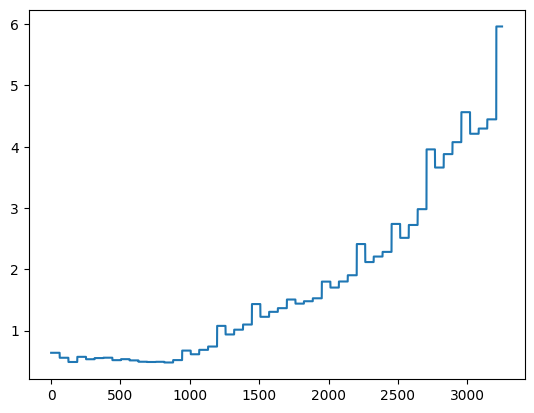

In [34]:
import matplotlib.pyplot as plt

df_combined_five[df_combined_five.TICKER=='AAPL'].de_ratio.plot()

## algorithm

In [35]:
df_combined = df_combined_five

In [36]:
from tqdm.notebook import tqdm

available_dates_per_ticker = {}
total_available_dates = []

# Group by ticker to process one ticker at a time
tickers_grouped = df_combined.groupby('TICKER')

for ticker, ticker_data in tqdm(tickers_grouped):
    ticker_data = ticker_data.sort_values(by='Date')
    dts = ticker_data.iloc[5:-2].Date
    available_dates_per_ticker[ticker] = dts
    total_available_dates.extend(list(dts))
    

  0%|          | 0/5 [00:00<?, ?it/s]

In [37]:
total_available_dates = sorted(list(set(total_available_dates)))

# Initialize an empty dictionary for the inverted index
date_to_tickers = {}

for ticker, dates in available_dates_per_ticker.items():
    date_to_index = {date: idx for date, idx in zip(dates, dates.index)}

    # Build the inverted index
    for date, idx in date_to_index.items():
        if date not in date_to_tickers:
            date_to_tickers[date] = []
        date_to_tickers[date].append((ticker, idx))

# Now, date_to_tickers is an inverted index where each date maps to a list of tickers

# Example: Query for tickers available on a specific central_date
central_date = pd.Timestamp('2020-09-25')
tickers_on_central_date = date_to_tickers.get(central_date, [])
print(f'Tickers available on {central_date}: {tickers_on_central_date}')


Tickers available on 2020-09-25 00:00:00: [('AAPL', 2681), ('AIR', 5933), ('LH', 9185), ('WMT', 12437), ('XOM', 15689)]


In [38]:
import numpy as np
def siccd_vectorize(string):
    try:
        string = str(int(float(string)))
        if len(string)==4:
            return np.array([int(string[0]),
                             int(string[:2]),
                             int(string[:3]),
                             int(string[:4])])
        elif len(string)==3:
            return np.array([int(string[0]),
                             int(string[:2]),
                             int(string[:3]),
                             10*int(string[:3])])
    except:
        return np.array([9,99,999,9999])

In [41]:
cd = 12

In [42]:
def six_to_two(df_slice,
              ts_cols=['de_ratio', 'ptb', 'debt_assets', 'inv_turn', 'at_turn', 'rect_turn', 
                  'cash_ratio', 'pe_inc', 'gpm', 'roe', 'roa', 'cfm', 'cash_debt','SP500_Return', 'VIX_Close','Daily_Return'],
              ):
    if len(df_slice) == 6:
        return df_slice[ts_cols].iloc[:5].values, siccd_vectorize(df_slice.correct_siccd.mode().iloc[0]), df_slice.Daily_Return.iloc[5]
    else:
        print('error')
        display(df_slice)

six_to_two(df_combined.iloc[cd-5:cd+1])

(array([[ 6.39000000e-01,  4.81500000e+00,  3.90000000e-01,
          6.22330000e+01,  9.69000000e-01,  1.08910000e+01,
          1.77200000e+00,  7.14000000e-01,  4.26000000e-01,
          3.41000000e-01,  3.11000000e-01,  2.31000000e-01,
          6.41000000e-01,  9.68043756e-03,  2.39599991e+01,
          1.81940447e-02],
        [ 6.39000000e-01,  4.81500000e+00,  3.90000000e-01,
          6.22330000e+01,  9.69000000e-01,  1.08910000e+01,
          1.77200000e+00,  7.14000000e-01,  4.26000000e-01,
          3.41000000e-01,  3.11000000e-01,  2.31000000e-01,
          6.41000000e-01, -2.74459282e-03,  2.27299995e+01,
          8.60715198e-03],
        [ 6.39000000e-01,  4.81500000e+00,  3.90000000e-01,
          6.22330000e+01,  9.69000000e-01,  1.08910000e+01,
          1.77200000e+00,  7.14000000e-01,  4.26000000e-01,
          3.41000000e-01,  3.11000000e-01,  2.31000000e-01,
          6.41000000e-01,  1.80007486e-02,  2.22500000e+01,
          1.50713450e-02],
        [ 6.3900000

In [43]:
Xs = []
X_stat_s = []
ys = []

from tqdm.notebook import tqdm

for central_date in tqdm(total_available_dates):
    list_ticker_row = date_to_tickers[central_date]
    
    X_day = []
    X_stat_day = []
    y_day = []
    
    for ticker,row in list_ticker_row:
        try:
            X,X_stat,y = six_to_two(df_combined.iloc[row-5:row+1])
            
            X_day.append(X)
            X_stat_day.append(X_stat)
            y_day.append(y)
        except:
            print(ticker, row)
            pass
        
    print(central_date, len(X_day), len(X_stat_day), len(y_day))
        
    Xs.append(np.array(X_day))
    X_stat_s.append(np.array(X_stat_day))
    ys.append(np.array(y_day))

  0%|          | 0/3245 [00:00<?, ?it/s]

2010-02-09 00:00:00 5 5 5
2010-02-10 00:00:00 5 5 5
2010-02-11 00:00:00 5 5 5
2010-02-12 00:00:00 5 5 5
2010-02-16 00:00:00 5 5 5
2010-02-17 00:00:00 5 5 5
2010-02-18 00:00:00 5 5 5
2010-02-19 00:00:00 5 5 5
2010-02-22 00:00:00 5 5 5
2010-02-23 00:00:00 5 5 5
2010-02-24 00:00:00 5 5 5
2010-02-25 00:00:00 5 5 5
2010-02-26 00:00:00 5 5 5
2010-03-01 00:00:00 5 5 5
2010-03-02 00:00:00 5 5 5
2010-03-03 00:00:00 5 5 5
2010-03-04 00:00:00 5 5 5
2010-03-05 00:00:00 5 5 5
2010-03-08 00:00:00 5 5 5
2010-03-09 00:00:00 5 5 5
2010-03-10 00:00:00 5 5 5
2010-03-11 00:00:00 5 5 5
2010-03-12 00:00:00 5 5 5
2010-03-15 00:00:00 5 5 5
2010-03-16 00:00:00 5 5 5
2010-03-17 00:00:00 5 5 5
2010-03-18 00:00:00 5 5 5
2010-03-19 00:00:00 5 5 5
2010-03-22 00:00:00 5 5 5
2010-03-23 00:00:00 5 5 5
2010-03-24 00:00:00 5 5 5
2010-03-25 00:00:00 5 5 5
2010-03-26 00:00:00 5 5 5
2010-03-29 00:00:00 5 5 5
2010-03-30 00:00:00 5 5 5
2010-03-31 00:00:00 5 5 5
2010-04-01 00:00:00 5 5 5
2010-04-05 00:00:00 5 5 5
2010-04-06 0

2013-03-05 00:00:00 5 5 5
2013-03-06 00:00:00 5 5 5
2013-03-07 00:00:00 5 5 5
2013-03-08 00:00:00 5 5 5
2013-03-11 00:00:00 5 5 5
2013-03-12 00:00:00 5 5 5
2013-03-13 00:00:00 5 5 5
2013-03-14 00:00:00 5 5 5
2013-03-15 00:00:00 5 5 5
2013-03-18 00:00:00 5 5 5
2013-03-19 00:00:00 5 5 5
2013-03-20 00:00:00 5 5 5
2013-03-21 00:00:00 5 5 5
2013-03-22 00:00:00 5 5 5
2013-03-25 00:00:00 5 5 5
2013-03-26 00:00:00 5 5 5
2013-03-27 00:00:00 5 5 5
2013-03-28 00:00:00 5 5 5
2013-04-01 00:00:00 5 5 5
2013-04-02 00:00:00 5 5 5
2013-04-03 00:00:00 5 5 5
2013-04-04 00:00:00 5 5 5
2013-04-05 00:00:00 5 5 5
2013-04-08 00:00:00 5 5 5
2013-04-09 00:00:00 5 5 5
2013-04-10 00:00:00 5 5 5
2013-04-11 00:00:00 5 5 5
2013-04-12 00:00:00 5 5 5
2013-04-15 00:00:00 5 5 5
2013-04-16 00:00:00 5 5 5
2013-04-17 00:00:00 5 5 5
2013-04-18 00:00:00 5 5 5
2013-04-19 00:00:00 5 5 5
2013-04-22 00:00:00 5 5 5
2013-04-23 00:00:00 5 5 5
2013-04-24 00:00:00 5 5 5
2013-04-25 00:00:00 5 5 5
2013-04-26 00:00:00 5 5 5
2013-04-29 0

2019-09-18 00:00:00 5 5 5
2019-09-19 00:00:00 5 5 5
2019-09-20 00:00:00 5 5 5
2019-09-23 00:00:00 5 5 5
2019-09-24 00:00:00 5 5 5
2019-09-25 00:00:00 5 5 5
2019-09-26 00:00:00 5 5 5
2019-09-27 00:00:00 5 5 5
2019-09-30 00:00:00 5 5 5
2019-10-01 00:00:00 5 5 5
2019-10-02 00:00:00 5 5 5
2019-10-03 00:00:00 5 5 5
2019-10-04 00:00:00 5 5 5
2019-10-07 00:00:00 5 5 5
2019-10-08 00:00:00 5 5 5
2019-10-09 00:00:00 5 5 5
2019-10-10 00:00:00 5 5 5
2019-10-11 00:00:00 5 5 5
2019-10-14 00:00:00 5 5 5
2019-10-15 00:00:00 5 5 5
2019-10-16 00:00:00 5 5 5
2019-10-17 00:00:00 5 5 5
2019-10-18 00:00:00 5 5 5
2019-10-21 00:00:00 5 5 5
2019-10-22 00:00:00 5 5 5
2019-10-23 00:00:00 5 5 5
2019-10-24 00:00:00 5 5 5
2019-10-25 00:00:00 5 5 5
2019-10-28 00:00:00 5 5 5
2019-10-29 00:00:00 5 5 5
2019-10-30 00:00:00 5 5 5
2019-10-31 00:00:00 5 5 5
2019-11-01 00:00:00 5 5 5
2019-11-04 00:00:00 5 5 5
2019-11-05 00:00:00 5 5 5
2019-11-06 00:00:00 5 5 5
2019-11-07 00:00:00 5 5 5
2019-11-08 00:00:00 5 5 5
2019-11-11 0

2022-10-11 00:00:00 5 5 5
2022-10-12 00:00:00 5 5 5
2022-10-13 00:00:00 5 5 5
2022-10-14 00:00:00 5 5 5
2022-10-17 00:00:00 5 5 5
2022-10-18 00:00:00 5 5 5
2022-10-19 00:00:00 5 5 5
2022-10-20 00:00:00 5 5 5
2022-10-21 00:00:00 5 5 5
2022-10-24 00:00:00 5 5 5
2022-10-25 00:00:00 5 5 5
2022-10-26 00:00:00 5 5 5
2022-10-27 00:00:00 5 5 5
2022-10-28 00:00:00 5 5 5
2022-10-31 00:00:00 5 5 5
2022-11-01 00:00:00 5 5 5
2022-11-02 00:00:00 5 5 5
2022-11-03 00:00:00 5 5 5
2022-11-04 00:00:00 5 5 5
2022-11-07 00:00:00 5 5 5
2022-11-08 00:00:00 5 5 5
2022-11-09 00:00:00 5 5 5
2022-11-10 00:00:00 5 5 5
2022-11-11 00:00:00 5 5 5
2022-11-14 00:00:00 5 5 5
2022-11-15 00:00:00 5 5 5
2022-11-16 00:00:00 5 5 5
2022-11-17 00:00:00 5 5 5
2022-11-18 00:00:00 5 5 5
2022-11-21 00:00:00 5 5 5
2022-11-22 00:00:00 5 5 5
2022-11-23 00:00:00 5 5 5
2022-11-25 00:00:00 5 5 5
2022-11-28 00:00:00 5 5 5
2022-11-29 00:00:00 5 5 5
2022-11-30 00:00:00 5 5 5
2022-12-01 00:00:00 5 5 5
2022-12-02 00:00:00 5 5 5
2022-12-05 0

In [44]:
import pickle

with open('Gopal_Xs_five.pkl', 'wb') as f:
    pickle.dump(Xs, f)
with open('Gopal_X_stat_s_five.pkl', 'wb') as f:
    pickle.dump(X_stat_s, f)
with open('Gopal_ys_five.pkl', 'wb') as f:
    pickle.dump(ys,f)

In [1]:
cols = ['de_ratio', 'ptb', 'debt_assets', 'inv_turn', 'at_turn', 'rect_turn', 
                  'cash_ratio', 'pe_inc', 'gpm', 'roe', 'roa', 'cfm', 'cash_debt','SP500_Return', 'VIX_Close','Daily_Return']

In [4]:
cols[:13]

['de_ratio',
 'ptb',
 'debt_assets',
 'inv_turn',
 'at_turn',
 'rect_turn',
 'cash_ratio',
 'pe_inc',
 'gpm',
 'roe',
 'roa',
 'cfm',
 'cash_debt']

In [5]:
cols[13:]

['SP500_Return', 'VIX_Close', 'Daily_Return']